<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison between Adagrad, PID and Adaptive PID


1.   Try to observe the convergence.
2.   Compare with Adaptive PID
3.   Trying to understand the overshoot problem.



In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

#Why we have choosen the following function:
[Ref]:K. De Jong, “An analysis of the behavior of a class of genetic adaptive systems,” Ph.D. dissertation, Dept. Comput. Commun. Sci.,Univ. Michigan, Ann Arbor, MI, USA, 1975.

*   The overshoot problem’s test benchmark is the first function
of [Ref] due to its smooth, unimodal, and symmetric characteristics. The function can be written as
 f(x) = 0.1*x1^2 + 2*x2^2 

*   whose search domain is −10 <= xi <= 10, i = 1, 2. For this
function x* = (0, 0), f (x*) = 0, we can pursue a global minimum rather than a local one.



In [2]:
def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [3]:
def grad_func_x1(x1):
  return 0.2*x1

In [4]:
def grad_func_x2(x2):
  return 4*x2

#Adagarde Update Rule: 
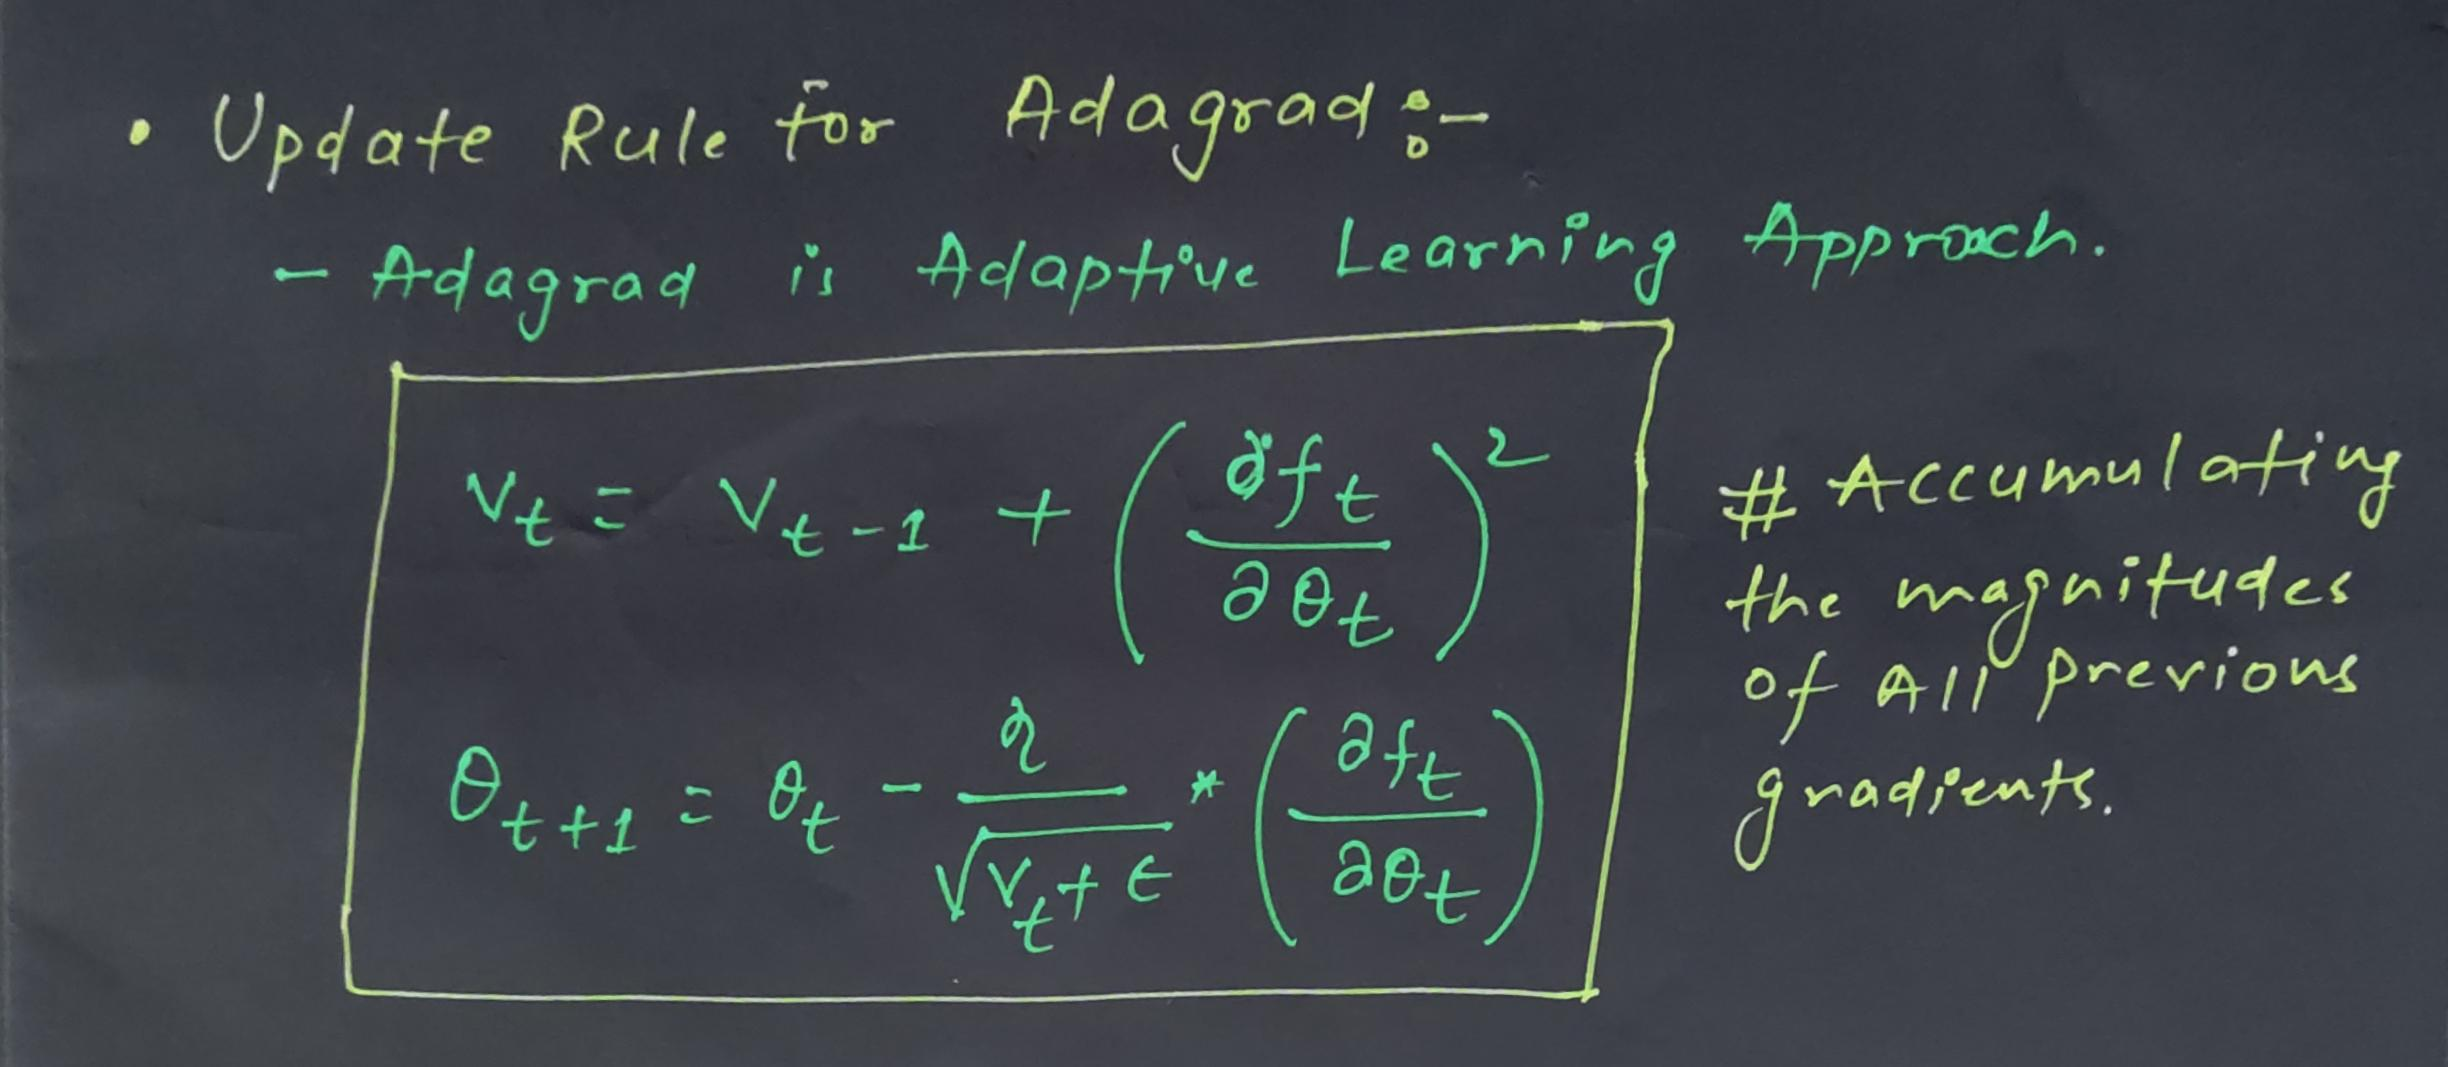

In [5]:
def Adagrad(lr = 0.05):
  x1, x2 =-10, -10 #parameters

  log = [] #To stores the parameters at each step

  vt_x1, prev_vt_x1, vt_x2, prev_vt_x2 = 0,0,0,0
  prev_x1, prev_x2 = x1, x2

  grad_x1, grad_x2 = 0,0

  eps = 1e-8

  t = 0
  while(1): #until convergence
    t+=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    vt_x1 = prev_vt_x1 + grad_x1**2
    vt_x2 = prev_vt_x2 + grad_x2**2

    prev_vt_x1 = vt_x1
    prev_vt_x2 = vt_x2

    log.append((x1,x2))

    prev_x1 = x1
    prev_x2 = x2

    x1 = prev_x1 - (lr*grad_x1)/math.sqrt(vt_x1 + eps)
    x2 = prev_x2 - (lr*grad_x2)/math.sqrt(vt_x2 + eps)

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log

In [6]:
x1, x2, log_11 = Adagrad(lr = 5.0)  #NoT converging when i have taken learning rate small. 
                                    #Problem in fixing the initial learning rate.
                                    

#PID

In [7]:
def PID_Otimizer(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 #parameters
  gamma = 0.9	

  log = [] # lists to store learning process

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  t=0

  while(1):
    t=t+1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = gamma*prev_mt_x1 + lr*grad_x1
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1
    prev_grad_x1 = grad_x1

    mt_x2 = gamma*prev_mt_x2 + lr*grad_x2
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2
    prev_grad_x2 = grad_x2

    log.append((x1,x2))

    x1_prev = x1
    x2_prev = x2

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1_prev == x1 and x2_prev == x2):
      break

  return x1, x2, log

In [8]:
x1, x2, log1 = PID_Otimizer(lr=0.01, Kd=4) #Tried with Kd=2,3,4 problem after Kd>=5 and Kd<0.8
x1, x2, log2 = PID_Otimizer(lr=0.01, Kd=3)
x1, x2, log3 = PID_Otimizer(lr=0.01, Kd=2)
x1, x2, log4 = PID_Otimizer(lr=0.01, Kd=1)
x1, x2, log5 = PID_Otimizer(lr=0.01, Kd=0.9)
x1, x2, log6 = PID_Otimizer(lr=0.01, Kd=0.8)
#x1, x2, log7 = PID_Otimizer(lr=0.01, Kd=0.7)


#Not converging for large value of learning rate.
#Not converging for Kd>=5 and Kd<=0.7

#Adaptive PID

In [9]:
def Adaptive_PID_Ada(lr = 0.05, Kd = 0.9):
  x1, x2 = -10, -10  #parametrs
  log = []  #list to store the value of x1 and x2 i.e learning process

  gamma =0.9 # momentum parameter
  eps = 1e-8

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  vt_x1, vt_x2, prev_vt_x1, prev_vt_x2 = 0,0,0,0  #Introducing for accumulating the magnitude of the gradient

  t = 0

  while(1):    #Until Convergence
    t +=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    vt_x1 = prev_vt_x1 + grad_x1**2  #Accumulating the magnitude of the gradient w.r.t first parameters
    mt_x1 = gamma*prev_mt_x1 + (lr*grad_x1)/math.sqrt(vt_x1 + eps)
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_grad_x1 = grad_x1
    prev_vt_x1 = vt_x1
    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1

    
    vt_x2 = prev_vt_x2 + grad_x2**2  #Accumulating the magnitude of the gradient w.r.t second parameters
    mt_x2 = gamma*prev_mt_x2 + (lr*grad_x2)/math.sqrt(vt_x2 + eps)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_grad_x2 = grad_x2
    prev_vt_x2 = vt_x2
    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log

In [10]:
x1, x2, log_1 = Adaptive_PID_Ada(lr=0.01, Kd=4) #Kd = 4
x1, x2, log_2 = Adaptive_PID_Ada(lr=0.01, Kd=3) #Kd = 3
x1, x2, log_3 = Adaptive_PID_Ada(lr=0.01, Kd=2) #Kd = 2
x1, x2, log_4 = Adaptive_PID_Ada(lr=0.01, Kd=1) #Kd = 1
x1, x2, log_5 = Adaptive_PID_Ada(lr=0.01, Kd=0.9) #Kd = 0.9
x1, x2, log_6 = Adaptive_PID_Ada(lr=0.01, Kd=0.8) #Kd = 0.8
#x1, x2, log_7 = Adaptive_PID_Ada(lr=0.01, Kd=5) #Kd = 5    #Not Converging

#Comparision between Adagrad, PID and Adaptive PID


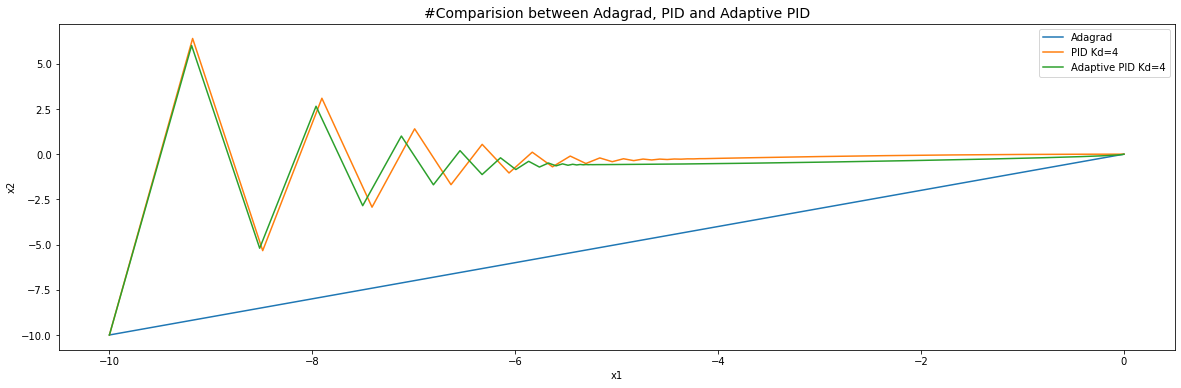

CPU times: user 3.5 s, sys: 37 ms, total: 3.54 s
Wall time: 3.54 s


In [11]:
%%time
x_val_11 = [l[0] for l in log_11]
y_val_11 = [l[1] for l in log_11]

x_val = [l[0] for l in log1]
y_val = [l[1] for l in log1]

x_val_1 = [l[0] for l in log_1]
y_val_1 = [l[1] for l in log_1]



plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Adagrad, PID and Adaptive PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_11,y_val_11, label='Adagrad')
plt.plot(x_val,y_val, label='PID Kd=4')
plt.plot(x_val_1,y_val_1, label='Adaptive PID Kd=4')

plt.legend()

plt.show()

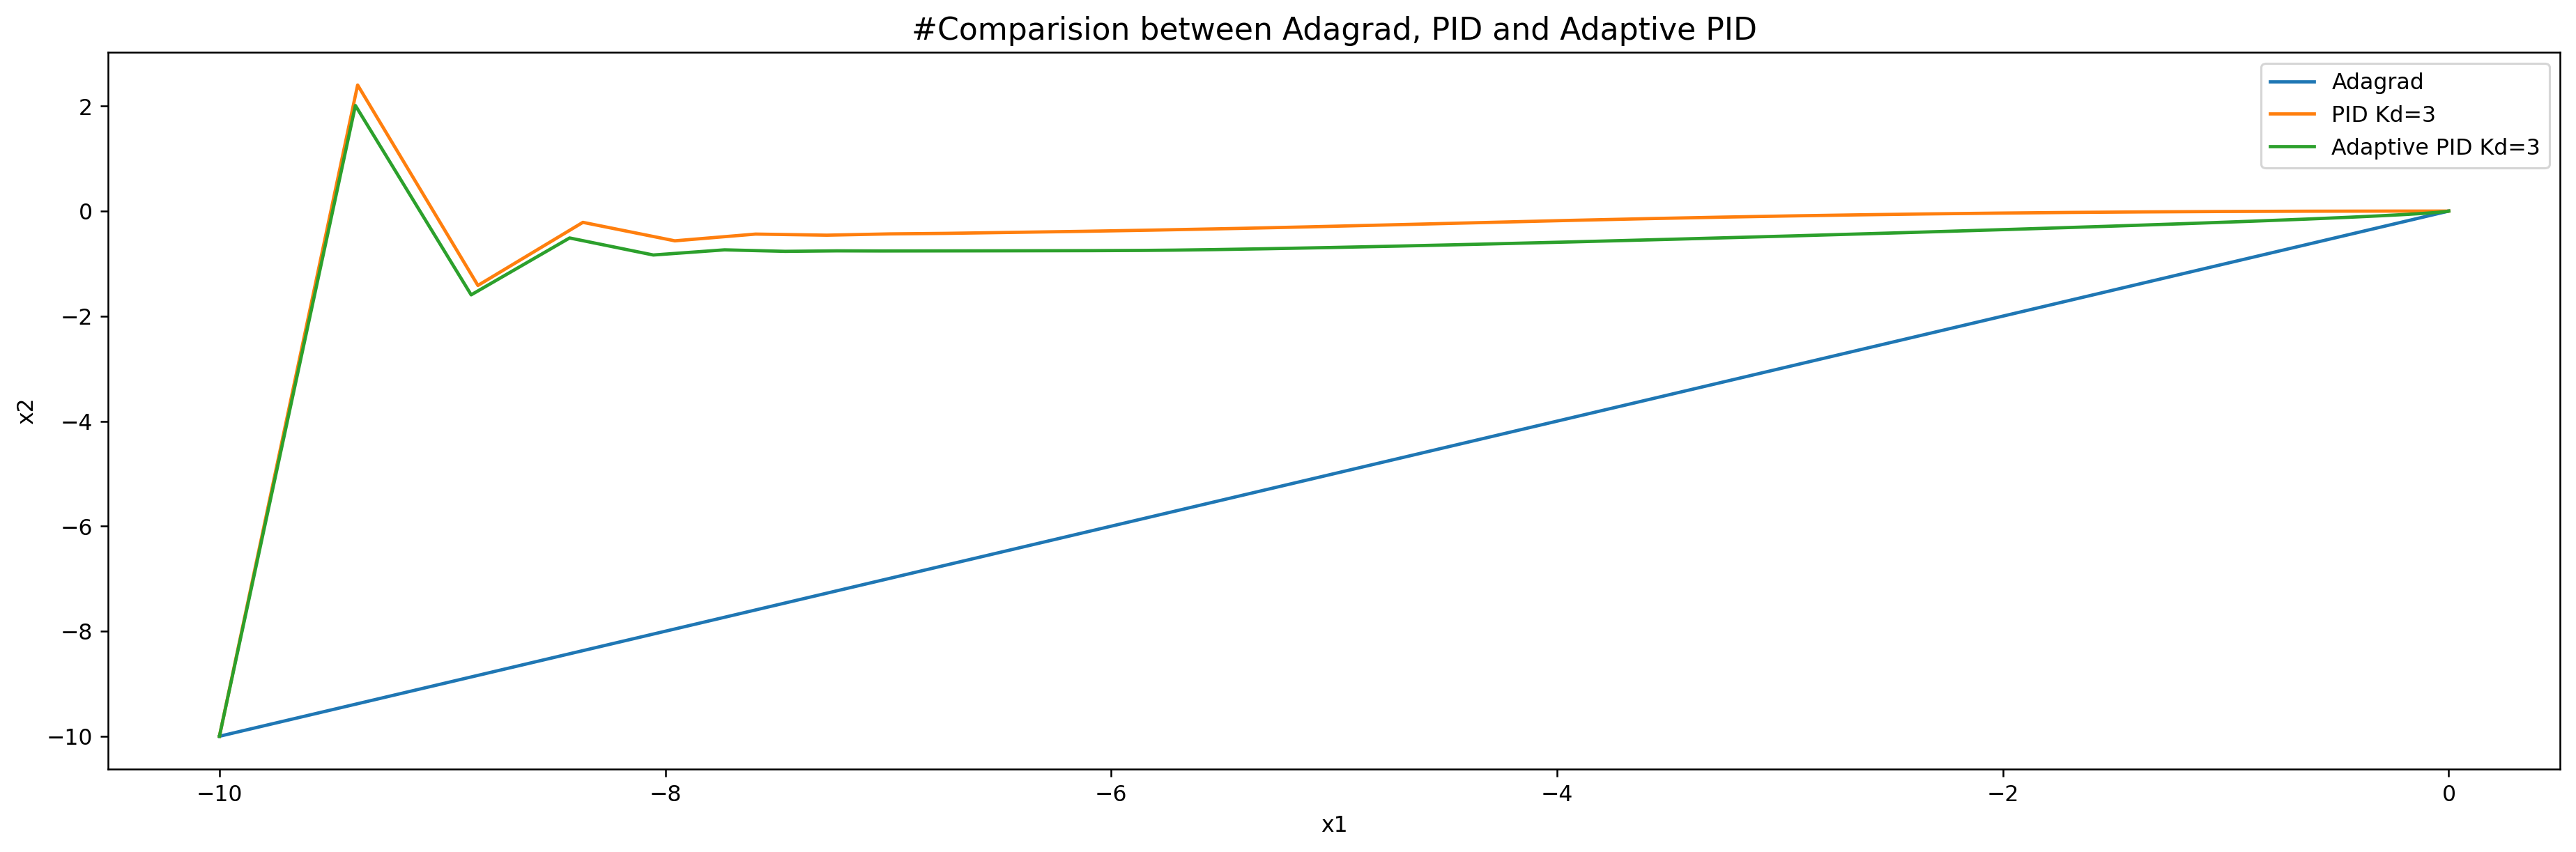

CPU times: user 3.04 s, sys: 56 ms, total: 3.09 s
Wall time: 3.1 s


In [12]:
%%time
x_val_11 = [l[0] for l in log_11]
y_val_11 = [l[1] for l in log_11]

x_val = [l[0] for l in log2]
y_val = [l[1] for l in log2]

x_val_2 = [l[0] for l in log_2]
y_val_2 = [l[1] for l in log_2]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Adagrad, PID and Adaptive PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_11,y_val_11, label='Adagrad')
plt.plot(x_val,y_val, label='PID Kd=3')
plt.plot(x_val_2,y_val_2, label='Adaptive PID Kd=3')

plt.legend()

plt.show()

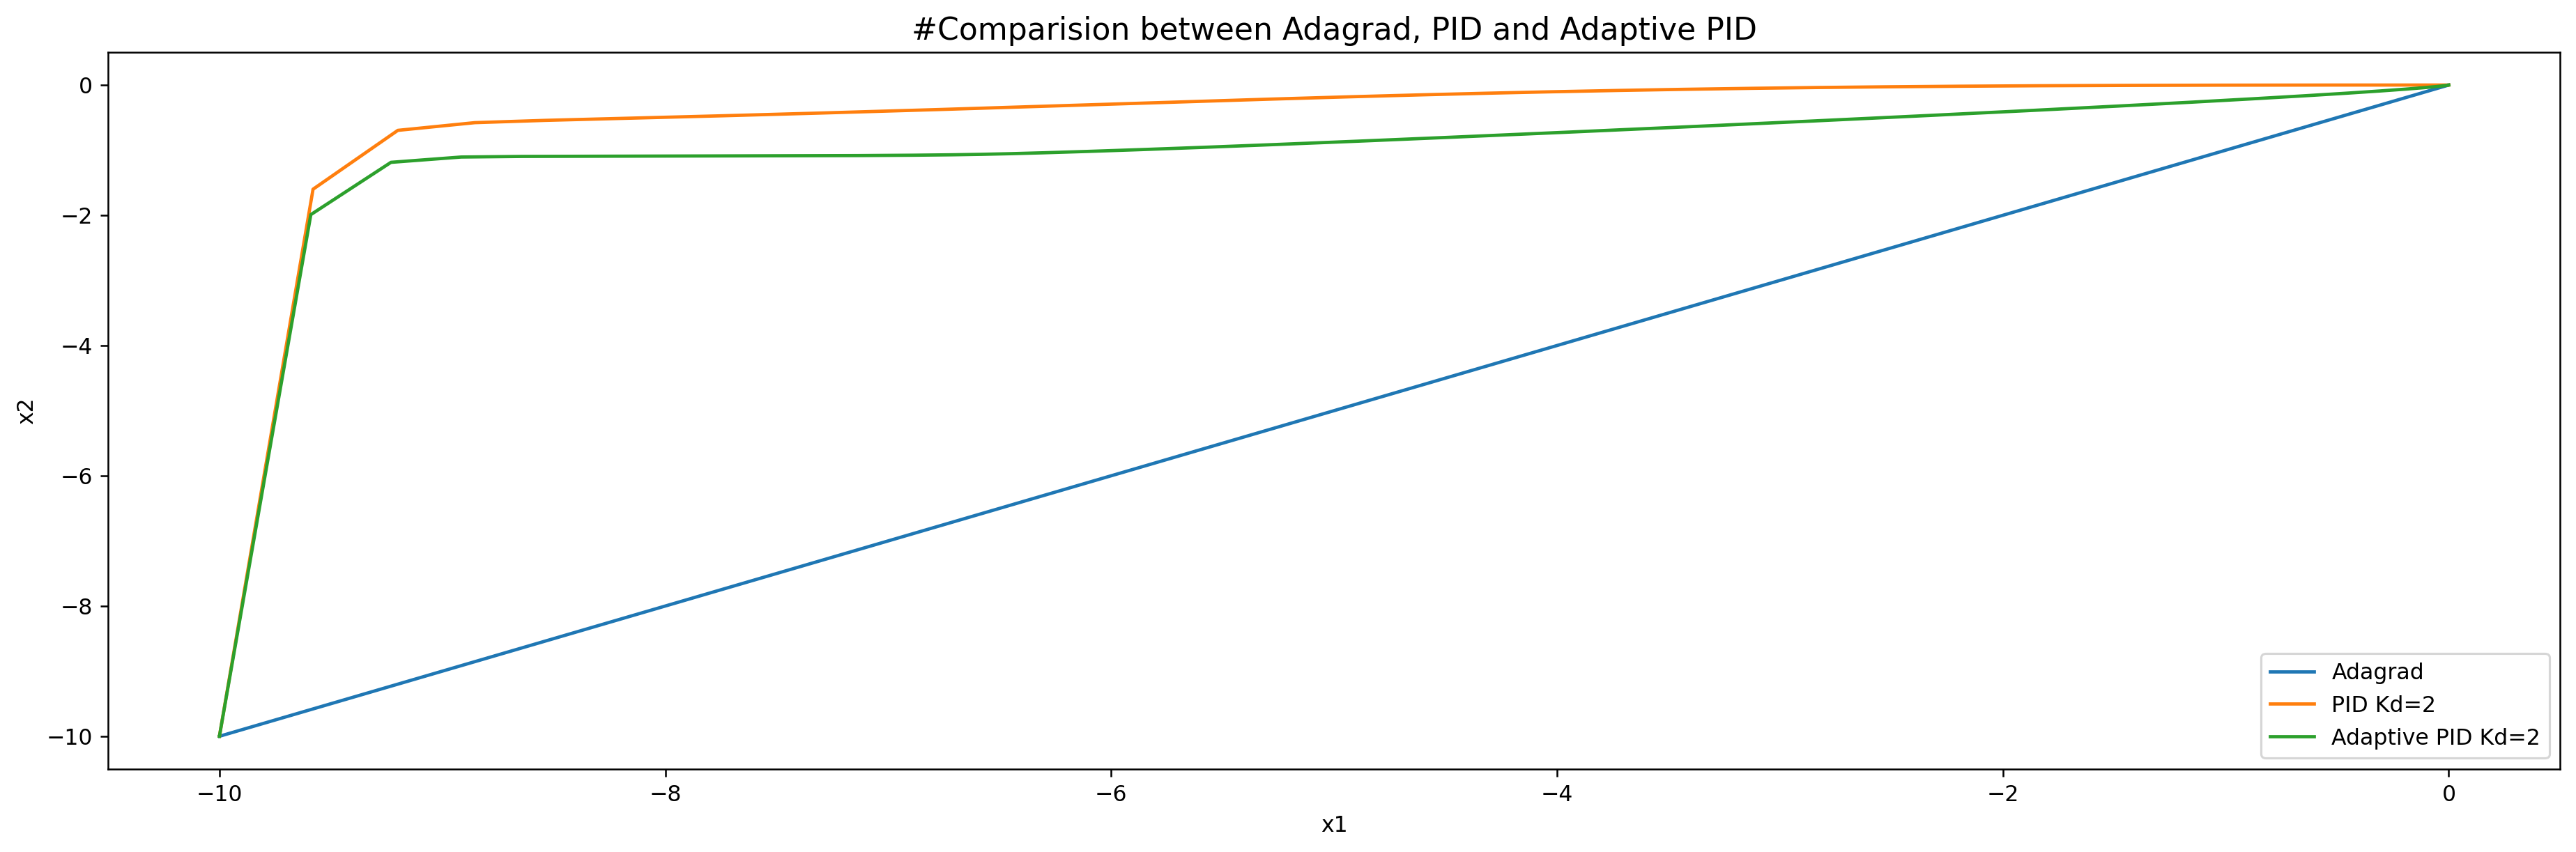

CPU times: user 4.07 s, sys: 45.9 ms, total: 4.12 s
Wall time: 4.12 s


In [13]:
%%time
x_val_11 = [l[0] for l in log_11]
y_val_11 = [l[1] for l in log_11]

x_val = [l[0] for l in log3]
y_val = [l[1] for l in log3]

x_val_3 = [l[0] for l in log_3]
y_val_3 = [l[1] for l in log_3]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Adagrad, PID and Adaptive PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_11,y_val_11, label='Adagrad')
plt.plot(x_val,y_val, label='PID Kd=2')
plt.plot(x_val_3,y_val_3, label='Adaptive PID Kd=2')

plt.legend()

plt.show()

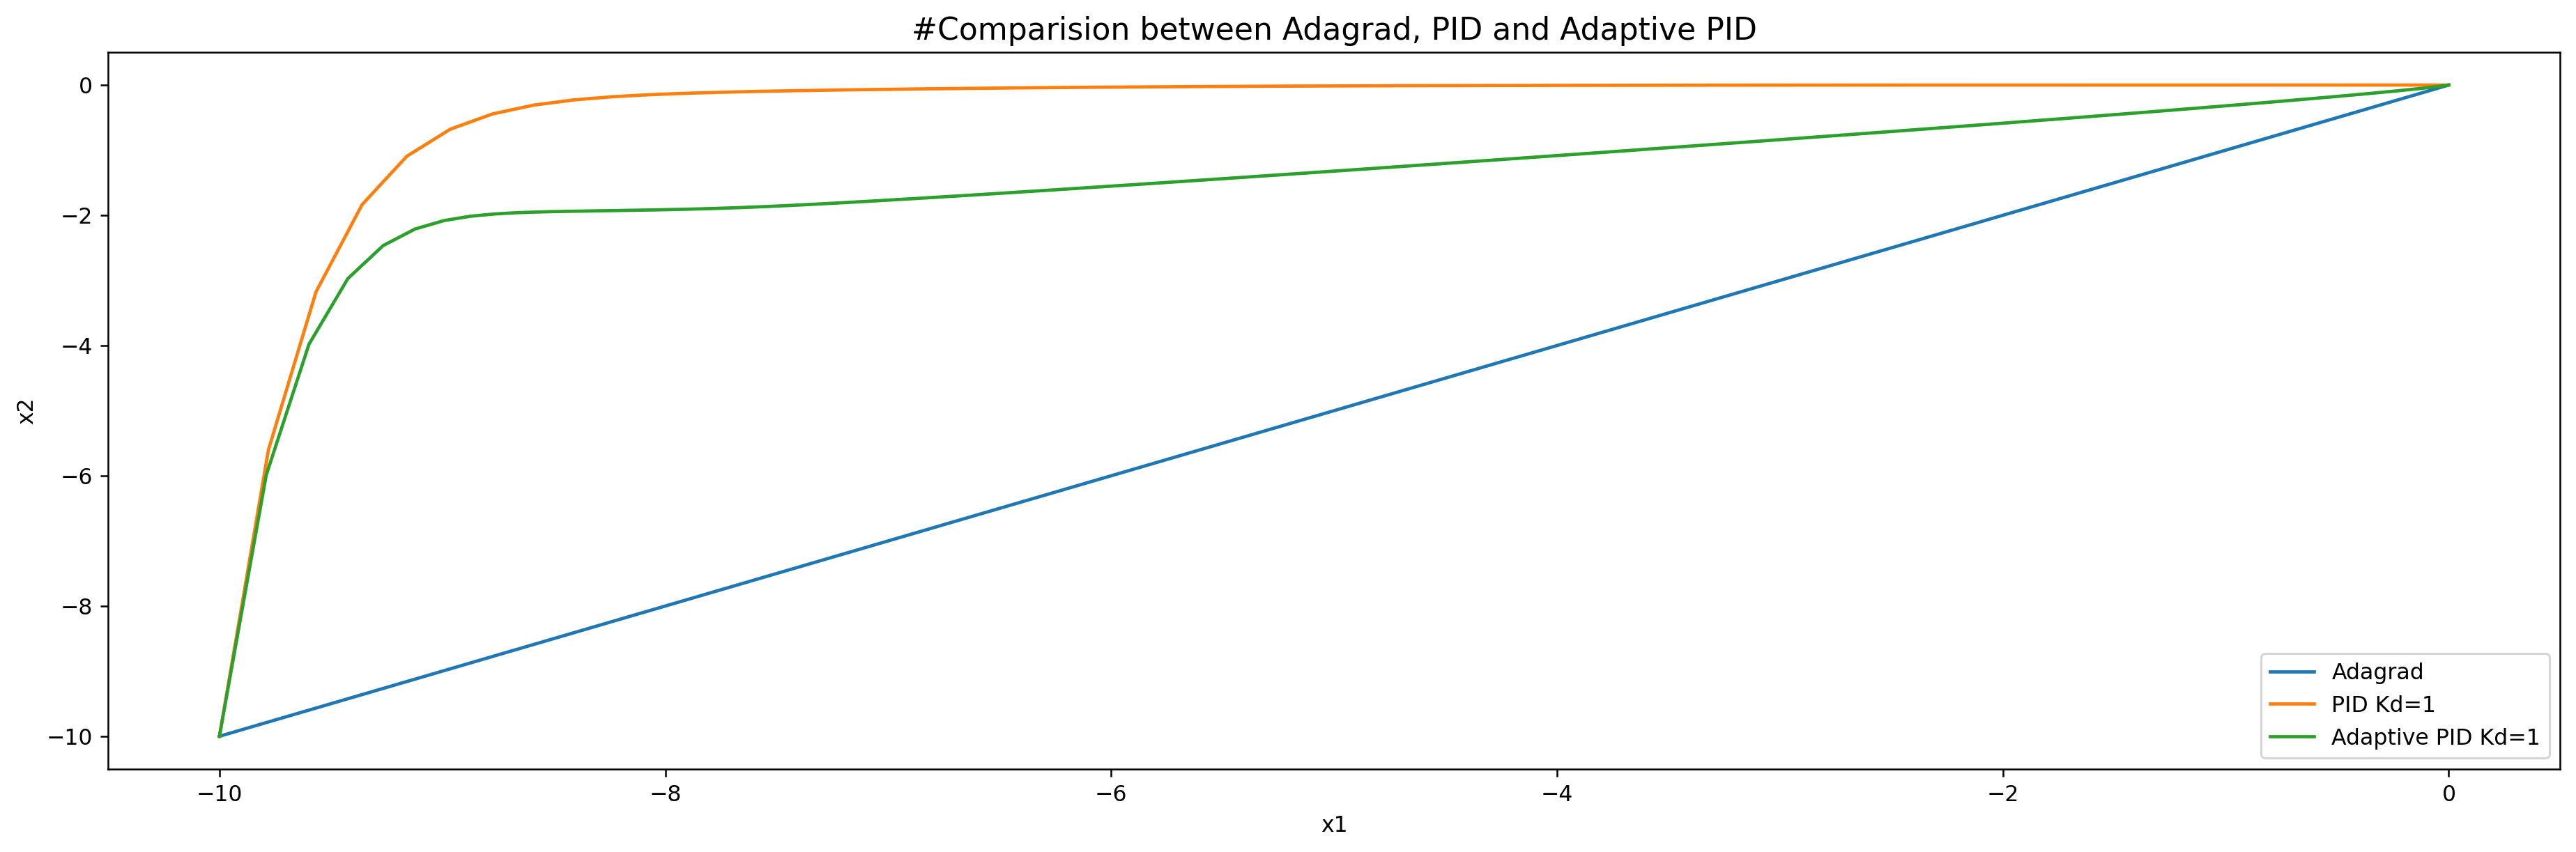

CPU times: user 4.79 s, sys: 21.9 ms, total: 4.81 s
Wall time: 4.82 s


In [14]:
%%time
x_val_11 = [l[0] for l in log_11]
y_val_11 = [l[1] for l in log_11]

x_val = [l[0] for l in log4]
y_val = [l[1] for l in log4]

x_val_4 = [l[0] for l in log_4]
y_val_4 = [l[1] for l in log_4]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Adagrad, PID and Adaptive PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_11,y_val_11, label='Adagrad')
plt.plot(x_val,y_val, label='PID Kd=1')
plt.plot(x_val_4,y_val_4, label='Adaptive PID Kd=1')

plt.legend()

plt.show()

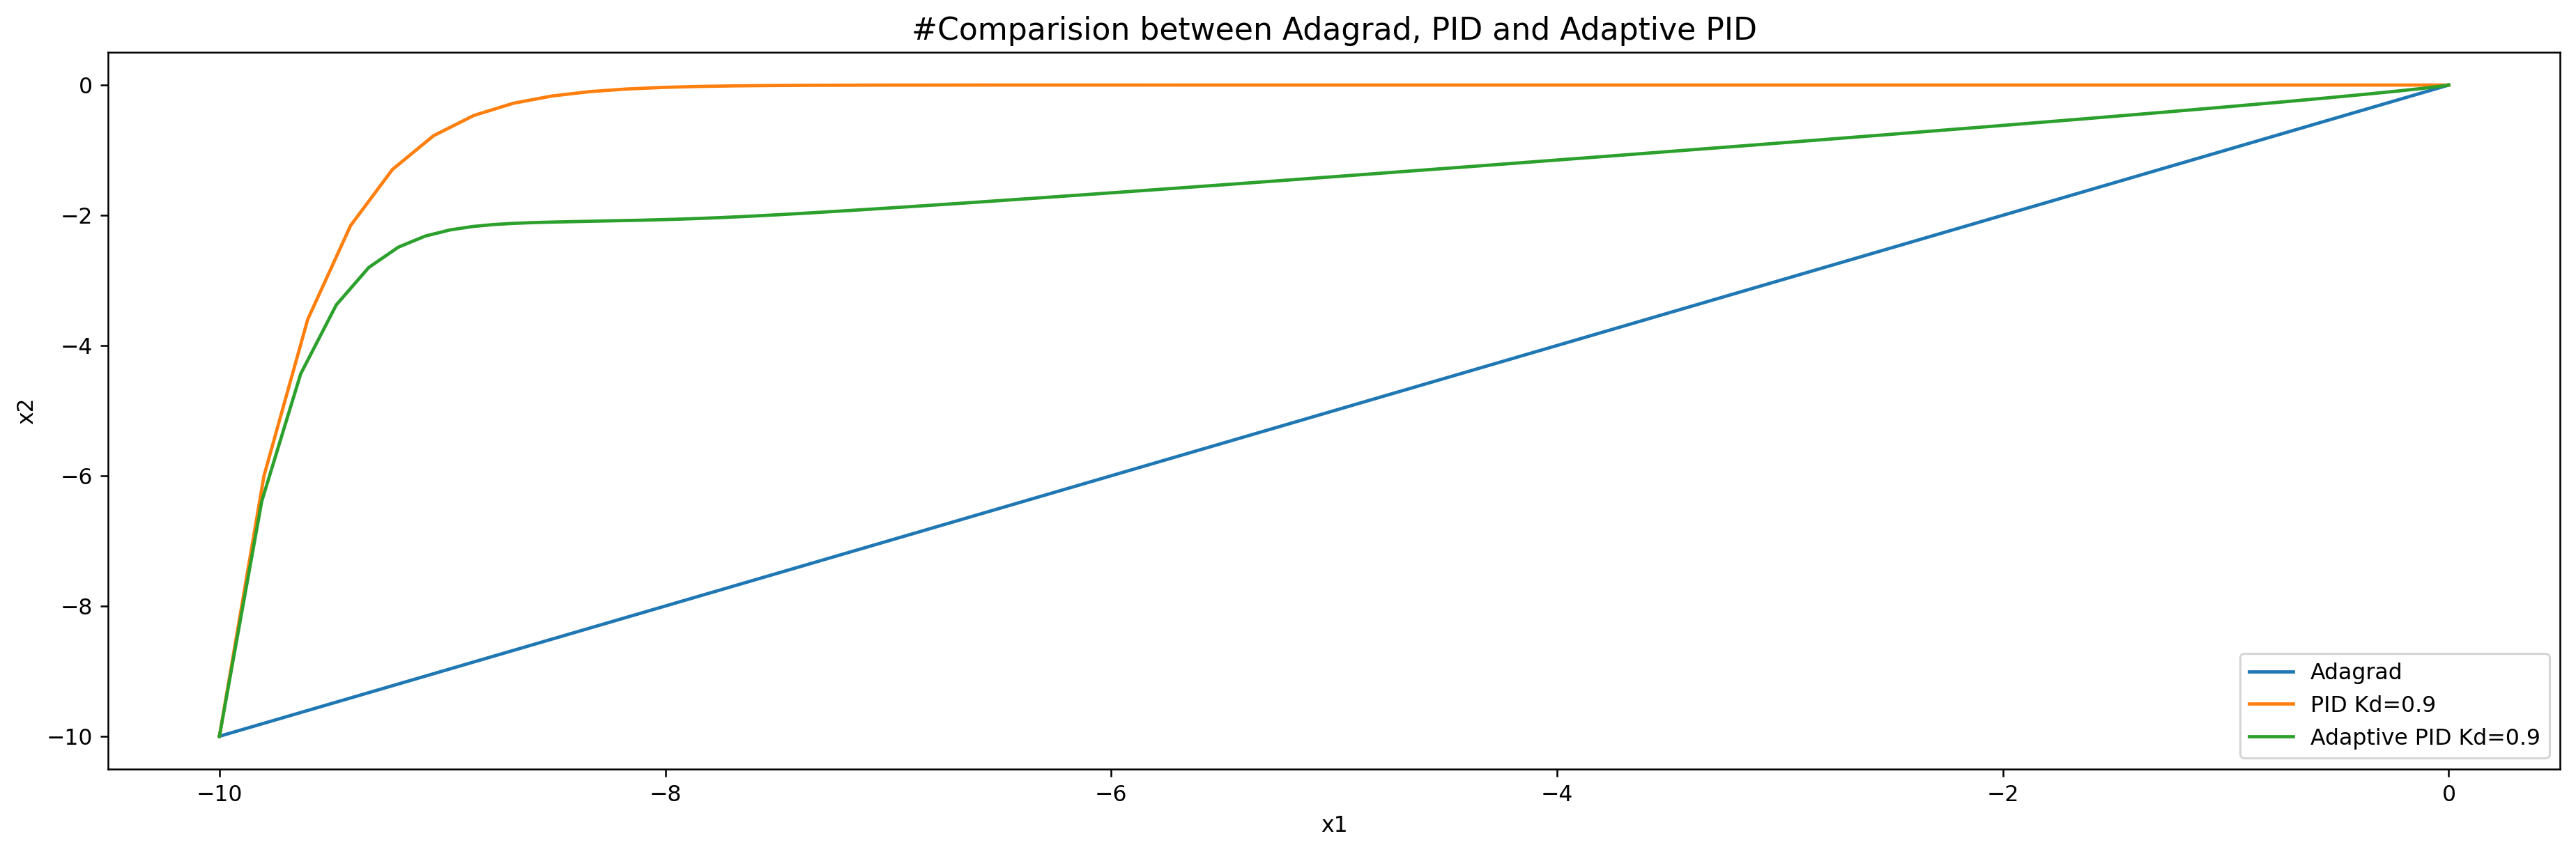

CPU times: user 3.89 s, sys: 19.1 ms, total: 3.9 s
Wall time: 3.9 s


In [15]:
%%time
x_val_11 = [l[0] for l in log_11]
y_val_11 = [l[1] for l in log_11]

x_val = [l[0] for l in log5]
y_val = [l[1] for l in log5]

x_val_4 = [l[0] for l in log_5]
y_val_4 = [l[1] for l in log_5]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Adagrad, PID and Adaptive PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_11,y_val_11, label='Adagrad')
plt.plot(x_val,y_val, label='PID Kd=0.9')
plt.plot(x_val_4,y_val_4, label='Adaptive PID Kd=0.9')

plt.legend()

plt.show()

#Conclusion: Experimet_3



*   Adagrad is performing well over PID and Adaptive PID.
*   Problem with choosing initial learning rate in Adagrad.
*   Adagrad converges faster if chooses large value of learning rate.
*   Tradeoff between learning rate and Kd in PID and Adaptive PID.
*   But Adaptive PID is performing better compared to PID, when we kept  all hyperparameters(lr and Kd) same.
*   Why PID and Adaptive PID not converges Faster than Adagrad?
   

*   In both the cases i.e PID and Adaptive PID parameter x1 is getting less update each time.
*   x2 is updating with significat value.(***I will try to fix this problem in both PID and Adaptive PID***)




